In [18]:
# Import all the required Python libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
%matplotlib inline
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_colwidth', None) #display full columns
pd.set_option('display.float_format', '{:0.4f}'.format) #Without this the Minmax scalar just displays 1s and 0s
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [19]:
#Load the csv into a df
df = pd.read_csv('D:\\Personal\\BITS\\Classification\\KNN\\Cancer_Dataset.csv')

In [20]:
#Lets review all the columns. There are 8 features.
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

# Exploratory Data Analysis

In [21]:
#Review the shape of the dataframe. There are 768 rows of data
df.shape

(768, 9)

df.describe()

In [22]:
#Reviewing the datatypes, all the columns are numeric. Hence there is no data conversion required.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## NA Values

In [23]:
# let's check the percentage of missing data
df.isnull().mean() #There are no NA values

Pregnancies      0.0000
Glucose          0.0000
BloodPressure    0.0000
SkinThickness    0.0000
Insulin          0.0000
BMI              0.0000
Cancer_Markers   0.0000
Age              0.0000
Outcome          0.0000
dtype: float64

In [24]:
#Just confirming again that there are no nulls
for i in df:
    print(df[df[i].isnull() == True])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Cancer_Markers, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness

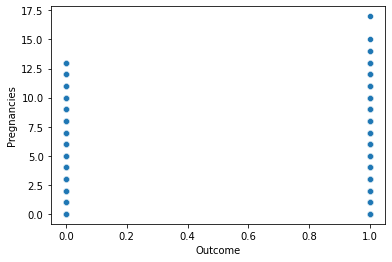

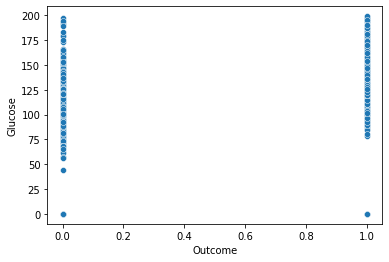

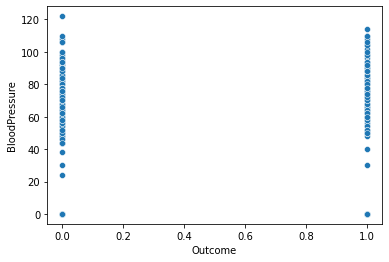

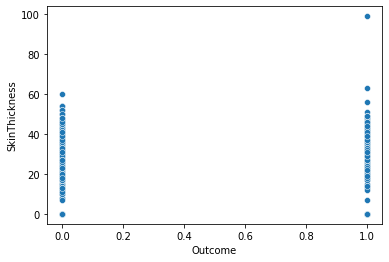

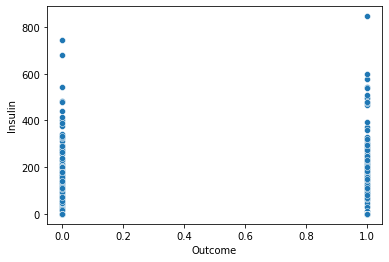

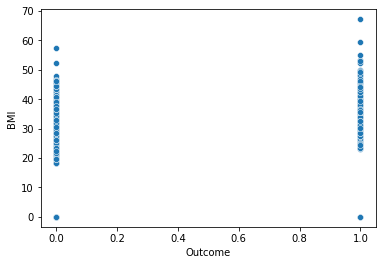

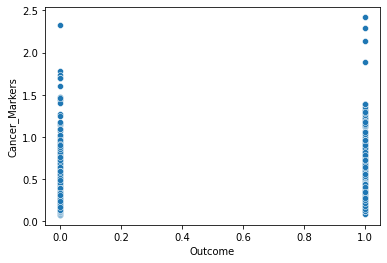

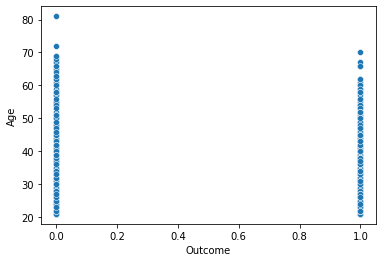

In [25]:
#Plotting correlations between class variable(Outcome) and all the independent variables using a for loop.
#No particular correlation observed

df1 = df.drop(['Outcome'], axis=1)
for i in df1.columns:
    plt.figure()
    sns.scatterplot(data=df1, x=df.Outcome, y=i)

<Figure size 432x288 with 0 Axes>

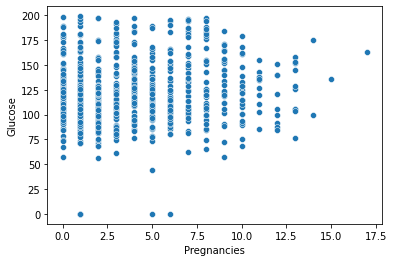

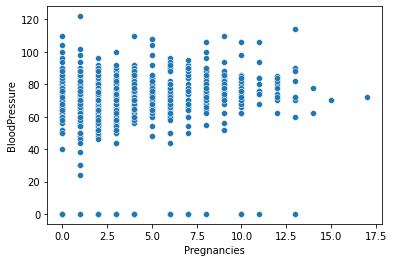

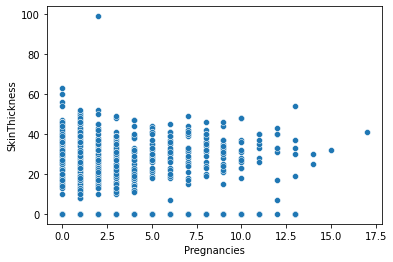

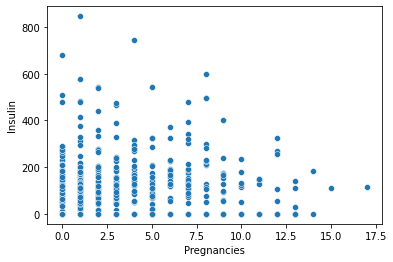

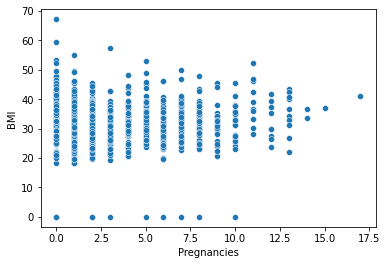

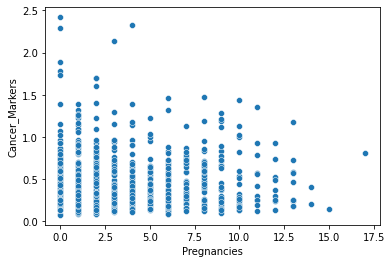

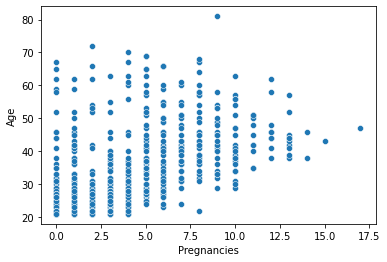

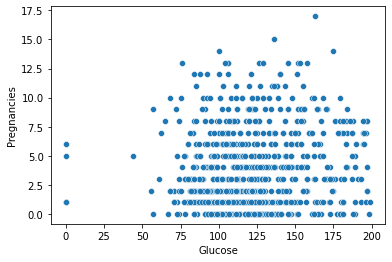

<Figure size 432x288 with 0 Axes>

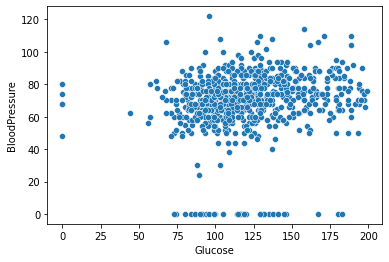

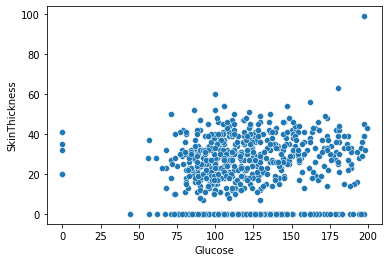

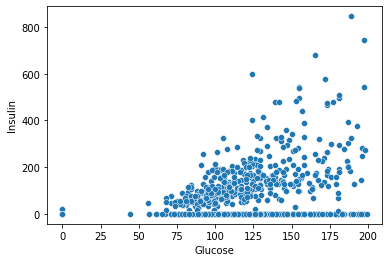

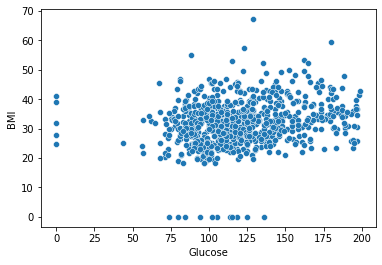

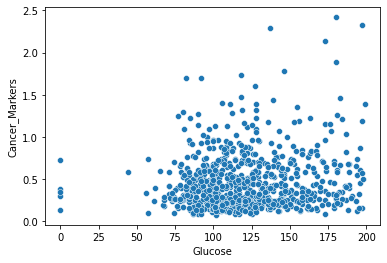

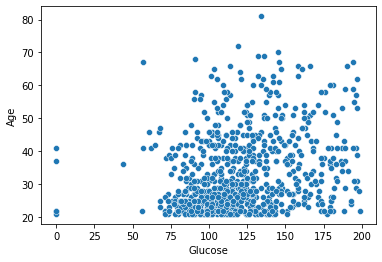

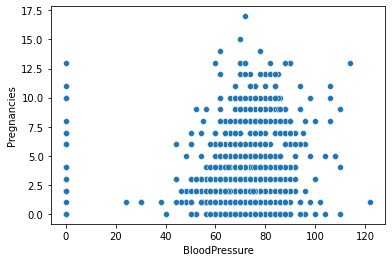

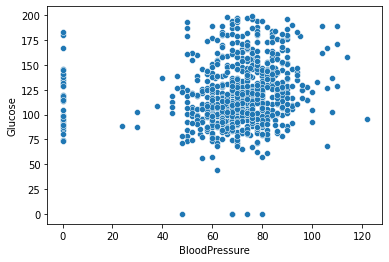

<Figure size 432x288 with 0 Axes>

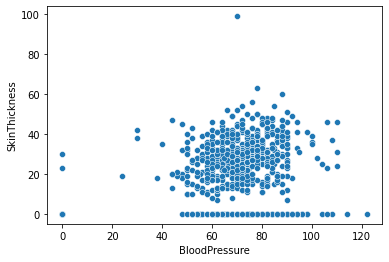

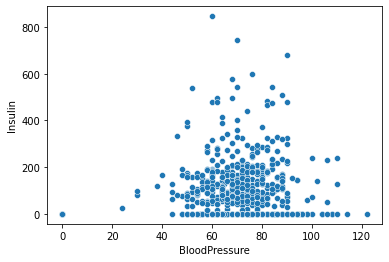

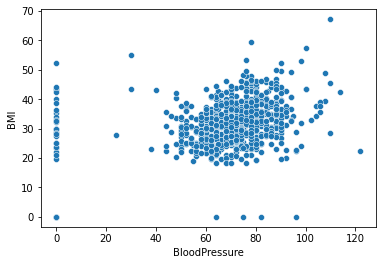

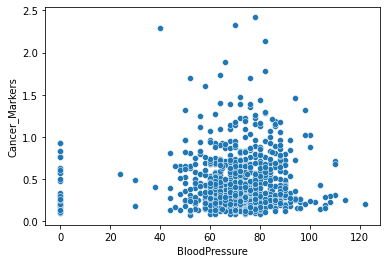

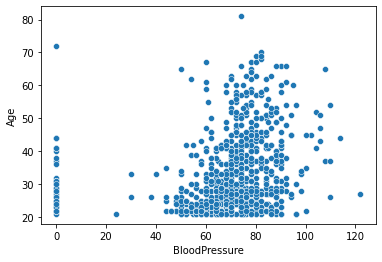

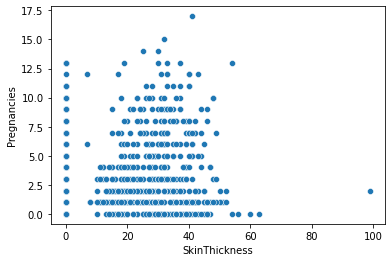

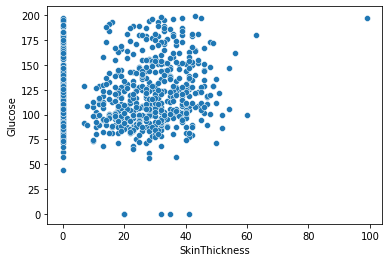

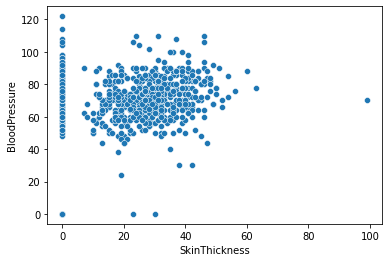

<Figure size 432x288 with 0 Axes>

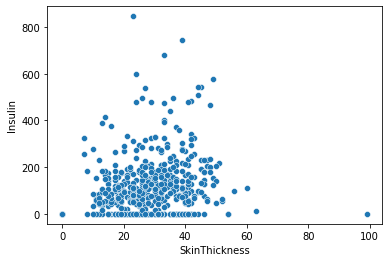

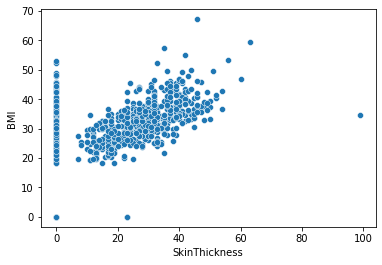

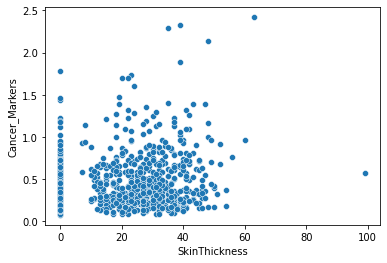

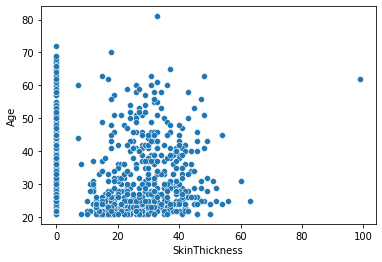

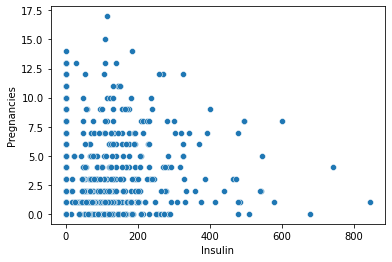

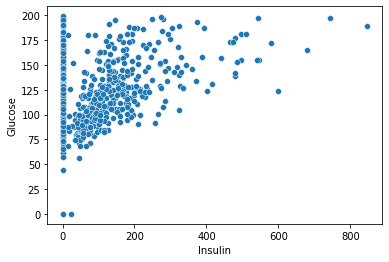

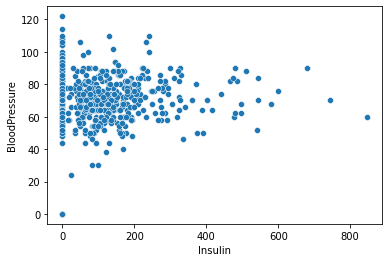

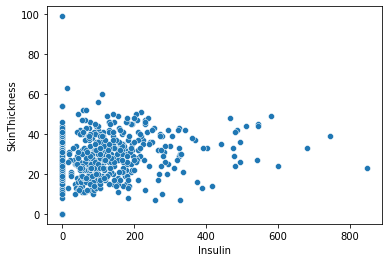

<Figure size 432x288 with 0 Axes>

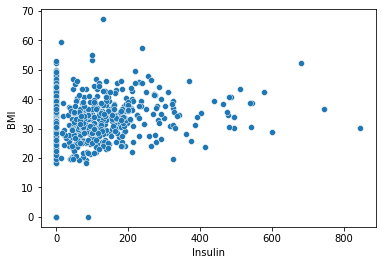

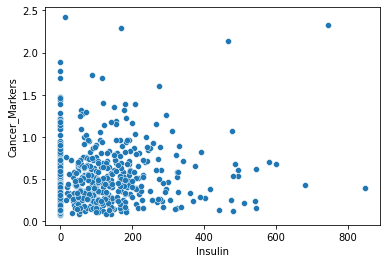

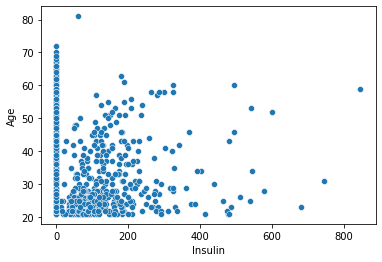

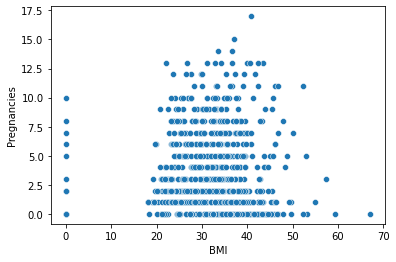

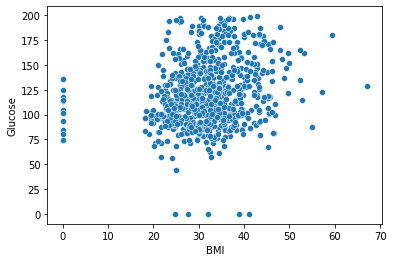

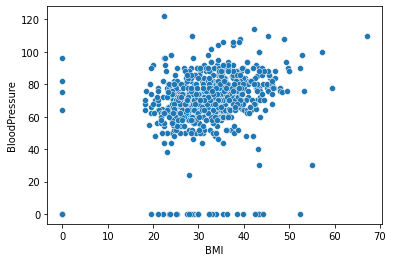

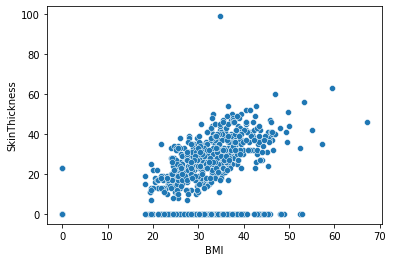

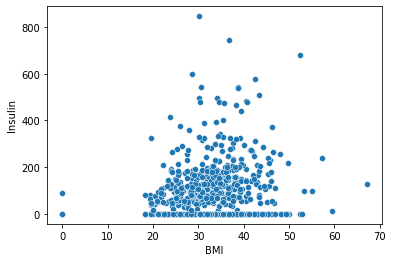

<Figure size 432x288 with 0 Axes>

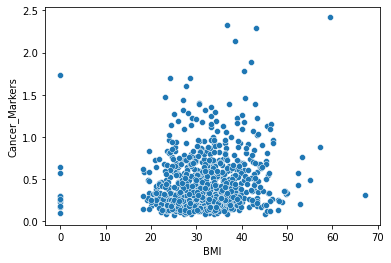

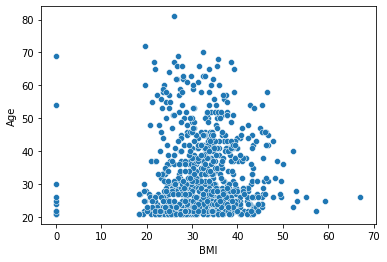

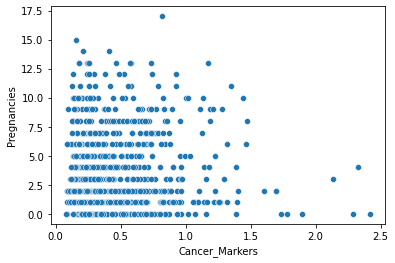

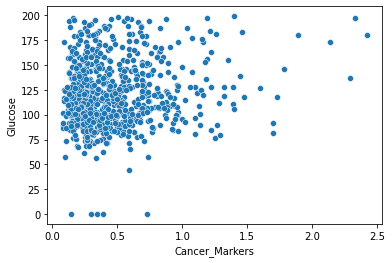

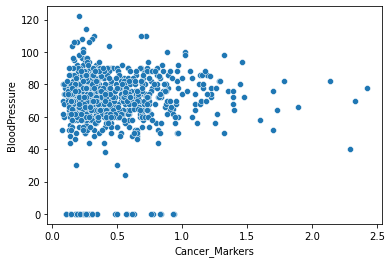

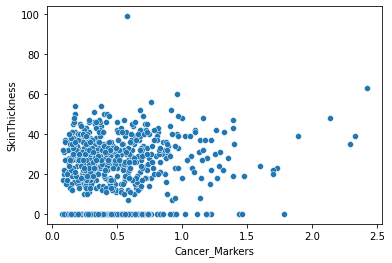

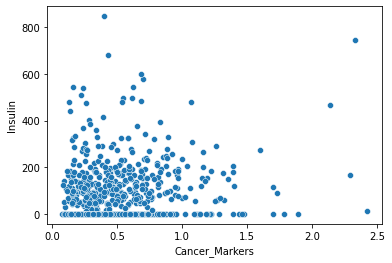

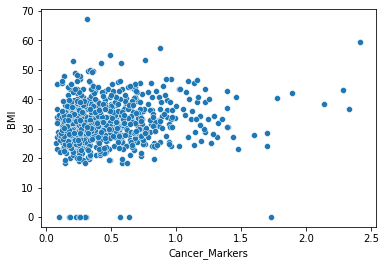

<Figure size 432x288 with 0 Axes>

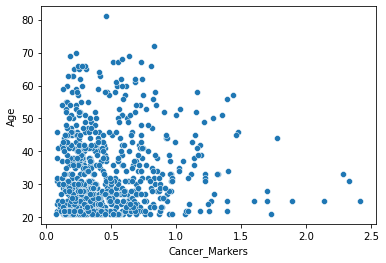

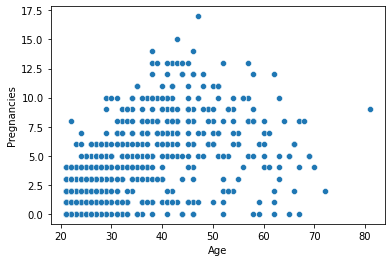

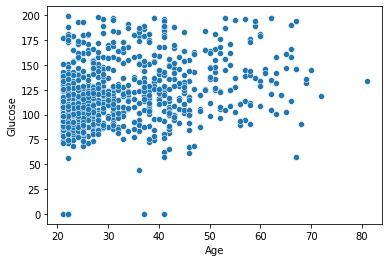

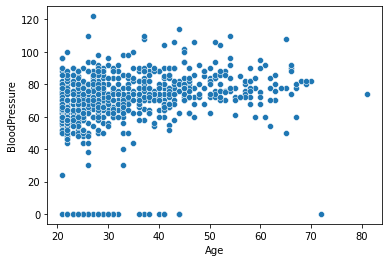

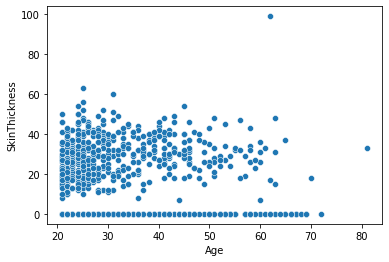

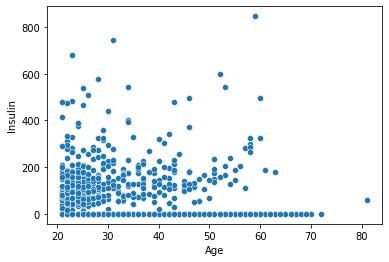

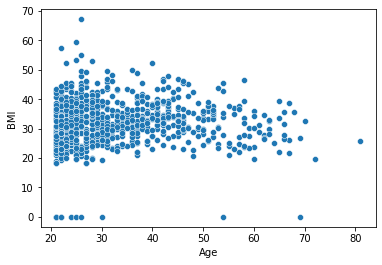

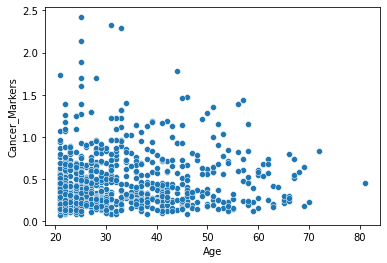

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting correlations between independent variables themselves
#Several charts show correlations. Lets look at them more closely using a pair plot blow
df1 = df.drop(['Outcome'], axis=1)
for i in df1.columns:
    for j in df1.columns:
        plt.figure()
        if i != j:
           sns.scatterplot(data=df1, x=i, y=j)

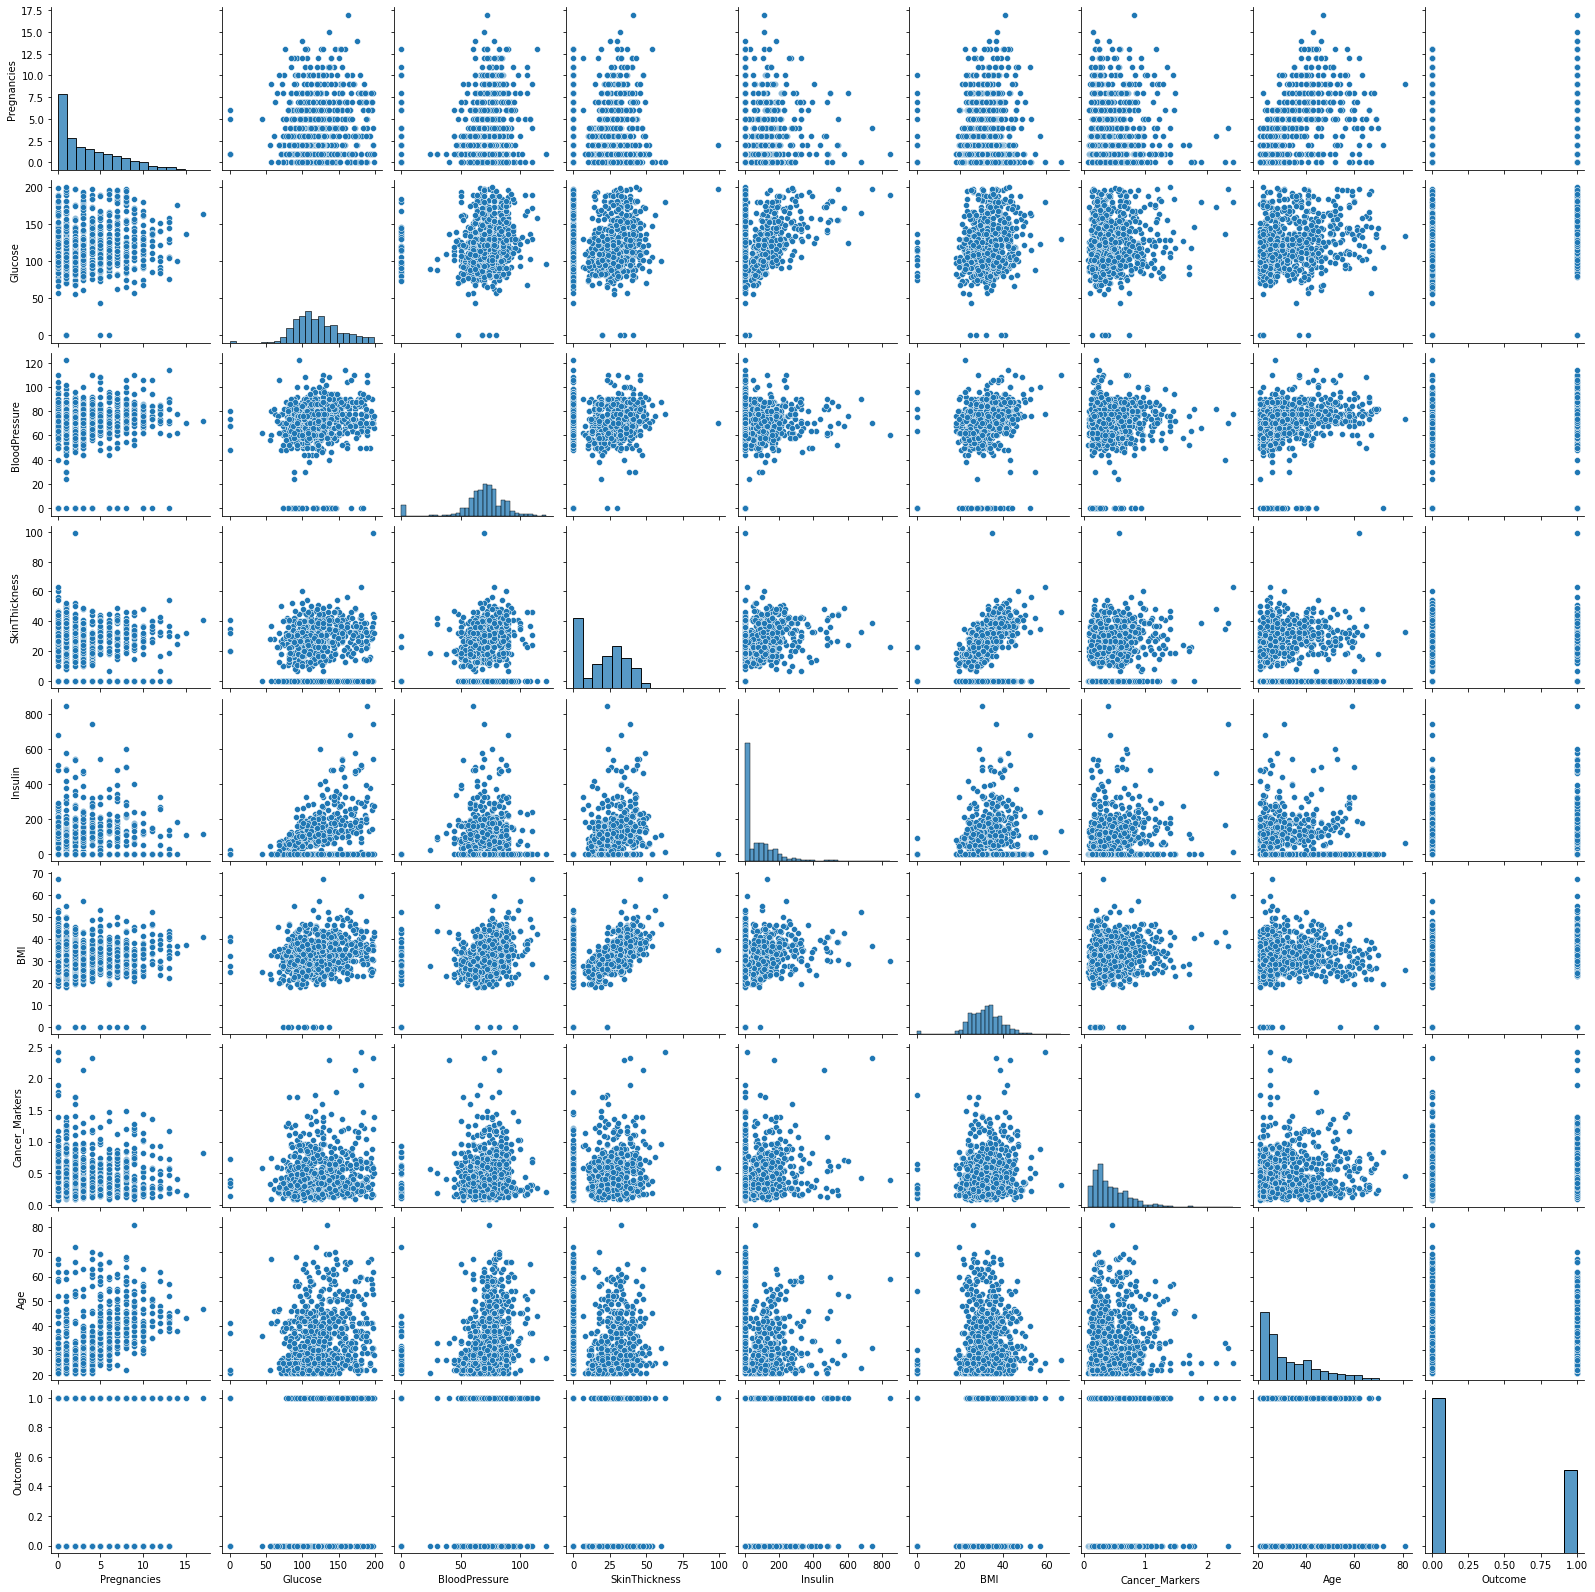

In [27]:
#Using pairplot for a Multi-variate analysis
#Correlations observed between several features, eg.BloopPressure-Glucose, BMI-Skinthickness, Age-Blooppressure etc.
sns.pairplot(df)
plt.show()

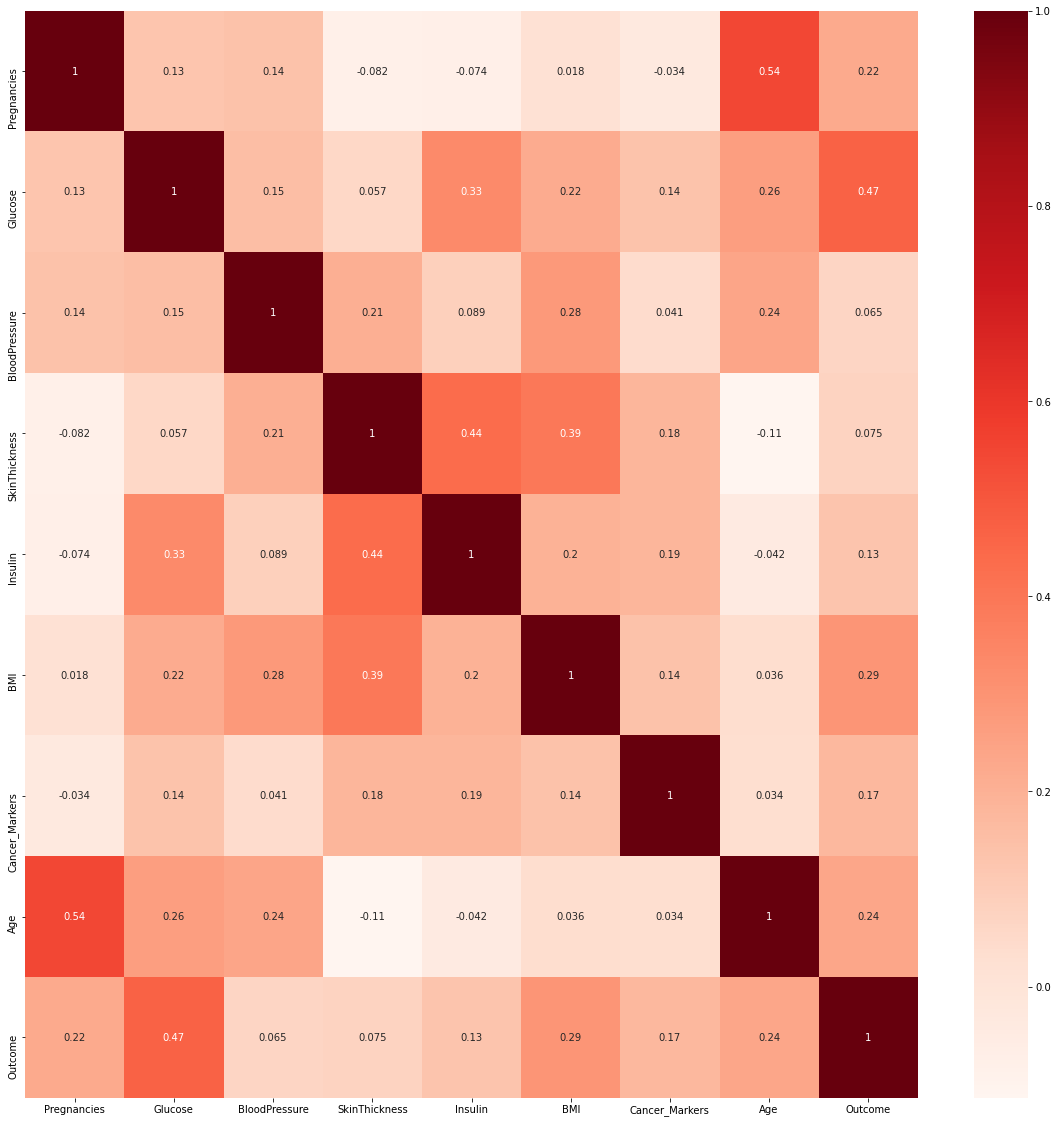

In [28]:
#Get pearson correlations of each feature in dataset using heatmap
corrmat = df.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#We can use describe to fetch min, max and mean for each column.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.3490
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.4770
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2437,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


In [30]:
#Alternatively, using individual functions to fetch min, max and mean for each column. This will be needed if replacing outliers or NA programatically 
# with these values.
for i in df.columns:
    print("Mean of column " + i + " is " + str(df[i].astype('float').mean(axis=0)))
    print("Max of column " + i + " is " + str(df[i].astype('float').max(axis=0)))
    print("Min of column " + i + " is " + str(df[i].astype('float').min(axis=0)))
    print("================")

Mean of column Pregnancies is 3.8450520833333335
Max of column Pregnancies is 17.0
Min of column Pregnancies is 0.0
Mean of column Glucose is 120.89453125
Max of column Glucose is 199.0
Min of column Glucose is 0.0
Mean of column BloodPressure is 69.10546875
Max of column BloodPressure is 122.0
Min of column BloodPressure is 0.0
Mean of column SkinThickness is 20.536458333333332
Max of column SkinThickness is 99.0
Min of column SkinThickness is 0.0
Mean of column Insulin is 79.79947916666667
Max of column Insulin is 846.0
Min of column Insulin is 0.0
Mean of column BMI is 31.992578124999998
Max of column BMI is 67.1
Min of column BMI is 0.0
Mean of column Cancer_Markers is 0.47187630208333325
Max of column Cancer_Markers is 2.42
Min of column Cancer_Markers is 0.078
Mean of column Age is 33.240885416666664
Max of column Age is 81.0
Min of column Age is 21.0
Mean of column Outcome is 0.3489583333333333
Max of column Outcome is 1.0
Min of column Outcome is 0.0


# Outlier Handling

### Checking and removal

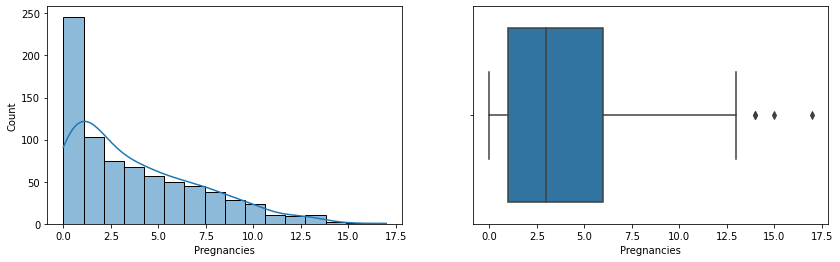

In [31]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.histplot(x="Pregnancies",data=df,ax=axes[0],kde=True)
sns.boxplot(x="Pregnancies",data=df,ax=axes[1]);
#There are 3 outliers

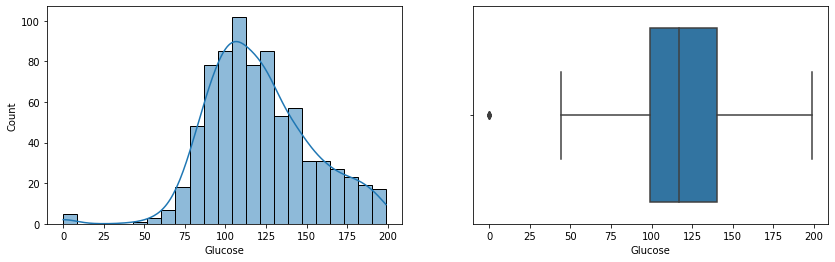

In [32]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.histplot(x="Glucose",data=df,ax=axes[0],kde=True)
sns.boxplot(x="Glucose",data=df,ax=axes[1]);
#There is one outlier

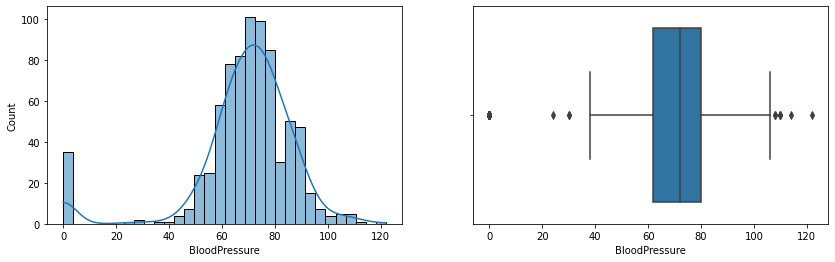

In [33]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.histplot(x="BloodPressure",data=df,ax=axes[0],kde=True)
sns.boxplot(x="BloodPressure",data=df,ax=axes[1]);
#Several outliers present

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

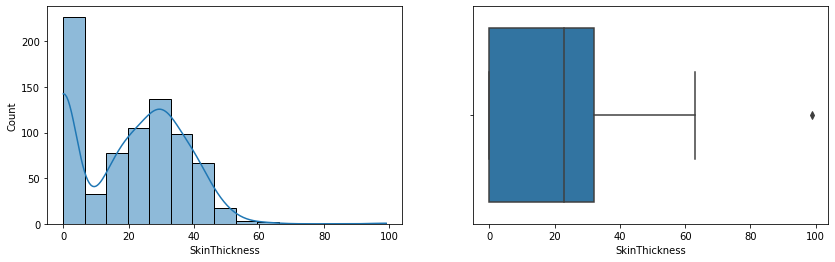

In [34]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x="SkinThickness",data=df,ax=axes[1]);
sns.histplot(x="SkinThickness",data=df,ax=axes[0],kde=True)

#One outlier present

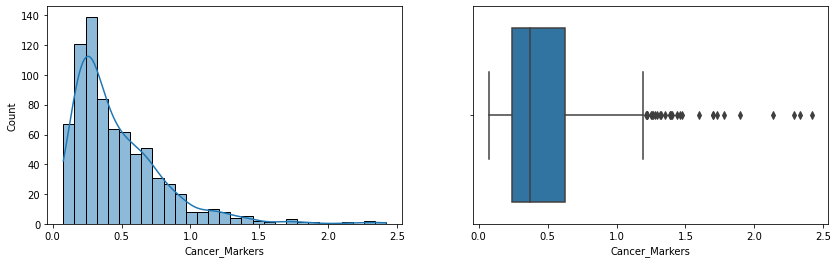

In [35]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.histplot(x="Cancer_Markers",data=df,ax=axes[0],kde=True)
sns.boxplot(x="Cancer_Markers",data=df,ax=axes[1]);
#Several outliers present

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

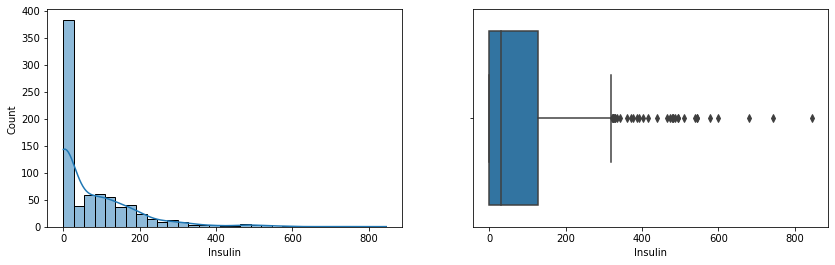

In [36]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x="Insulin",data=df,ax=axes[1]);
sns.histplot(x="Insulin",data=df,ax=axes[0],kde=True)

#Several outliers present

<AxesSubplot:xlabel='BMI', ylabel='Count'>

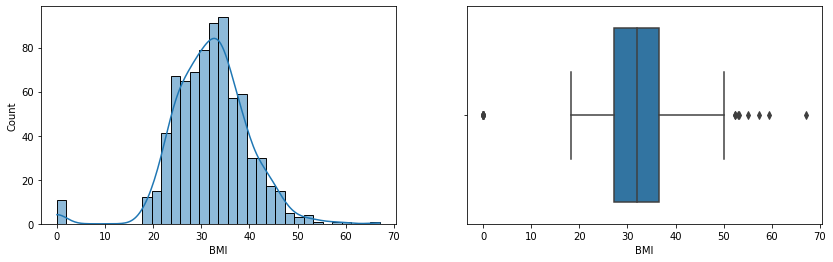

In [37]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x="BMI",data=df,ax=axes[1]);
sns.histplot(x="BMI",data=df,ax=axes[0],kde=True)

#Many outliers present

<AxesSubplot:xlabel='Age', ylabel='Count'>

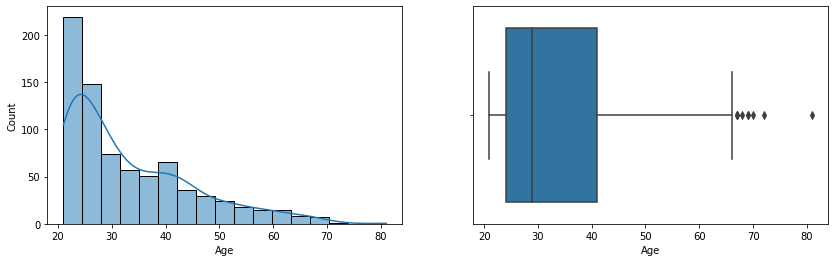

In [38]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
sns.boxplot(x="Age",data=df,ax=axes[1]);
sns.histplot(x="Age",data=df,ax=axes[0],kde=True)

#Many outliers present

In [39]:
#Below columns have 0 but that is not possible

non0DF = ["BMI","BloodPressure","Insulin","Glucose","SkinThickness","Age"]

for column in non0DF:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

In [40]:
min_skin , max_skin = df.SkinThickness.quantile([0.01,0.99])
min_bmi , max_bmi = df.BMI.quantile([0.01,0.99])
min_bp , max_bp = df.BloodPressure.quantile([0.01,0.99])
min_insulin , max_insulin = df.Insulin.quantile([0.01,0.99])
min_mark , max_mark = df.Cancer_Markers.quantile([0.01,0.99])
min_glucose , max_glucose = df.Glucose.quantile([0.01,0.99])
min_preg , max_preg = df.Pregnancies.quantile([0.01,0.99])
min_age , max_age = df.Age.quantile([0.01,0.99])

In [41]:
#Finding the outliers in the pregnancies
df[(df['Pregnancies'] > max_preg) | (df['Pregnancies'] < min_preg)]

#There are 4 instances which are certainly possible. Hence no action taken.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
88,15,136.0000,70.0000,32.0000,110.0000,37.1000,0.1530,43,1
159,17,163.0000,72.0000,41.0000,114.0000,40.9000,0.8170,47,1
298,14,100.0000,78.0000,25.0000,184.0000,36.6000,0.4120,46,1
455,14,175.0000,62.0000,30.0000,155.0000,33.6000,0.2120,38,1


In [42]:
#Outliers in Glucose
df[(df['Glucose'] > max_glucose) | (df['Glucose'] < min_glucose)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
8,2,197.0000,70.0000,45.0000,543.0000,30.5000,0.1580,53,1
62,5,44.0000,62.0000,29.0000,155.0000,25.0000,0.5870,36,0
76,7,62.0000,78.0000,29.0000,155.0000,32.6000,0.3910,41,0
146,9,57.0000,80.0000,37.0000,155.0000,32.8000,0.0960,41,0
228,4,197.0000,70.0000,39.0000,744.0000,36.7000,2.3290,31,0
352,3,61.0000,82.0000,28.0000,155.0000,34.4000,0.2430,46,0
408,8,197.0000,74.0000,29.0000,155.0000,25.9000,1.1910,39,1
537,0,57.0000,60.0000,29.0000,155.0000,21.7000,0.7350,67,0
561,0,198.0000,66.0000,32.0000,274.0000,41.3000,0.5020,28,1
579,2,197.0000,70.0000,99.0000,155.0000,34.7000,0.5750,62,1


In [43]:
#Replacing outliers with mean
avg_glucose = df['Glucose'].astype('int').mean(axis=0)
df["Glucose"] = np.where(df["Glucose"] >max_glucose, avg_glucose,df['Glucose'])
df["Glucose"] = np.where(df["Glucose"] <min_glucose, avg_glucose,df['Glucose'])

In [44]:
#outliers in the blood pressure
df[(df['BloodPressure'] > max_bp) | (df['BloodPressure'] < min_bp)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
4,0,137.0000,40.0000,35.0000,168.0000,43.1000,2.2880,33,1
18,1,103.0000,30.0000,38.0000,83.0000,43.3000,0.1830,33,0
43,9,171.0000,110.0000,24.0000,240.0000,45.4000,0.7210,54,1
84,5,137.0000,108.0000,29.0000,155.0000,48.8000,0.2270,37,1
106,1,96.0000,122.0000,29.0000,155.0000,22.4000,0.2070,27,0
125,1,88.0000,30.0000,42.0000,99.0000,55.0000,0.4960,26,1
177,0,129.0000,110.0000,46.0000,130.0000,67.1000,0.3190,26,1
362,5,103.0000,108.0000,37.0000,155.0000,39.2000,0.3050,65,0
549,4,189.0000,110.0000,31.0000,155.0000,28.5000,0.6800,37,0
597,1,89.0000,24.0000,19.0000,25.0000,27.8000,0.5590,21,0


In [45]:
#Replacing outliers with mean
avg_bp = df['BloodPressure'].astype('int').mean(axis=0)
df["BloodPressure"] = np.where(df["BloodPressure"] >max_bp, avg_bp,df['BloodPressure'])
df["BloodPressure"] = np.where(df["BloodPressure"] <min_bp, avg_bp,df['BloodPressure'])

In [46]:
#outliers in the skin thickness
df[(df['SkinThickness'] > max_skin) | (df['SkinThickness'] < min_skin)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
57,0,100.0000,88.0000,60.0000,110.0000,46.8000,0.9620,31,0
86,13,106.0000,72.0000,54.0000,155.0000,36.6000,0.1780,45,0
120,0,162.0000,76.0000,56.0000,100.0000,53.2000,0.7590,25,1
211,0,147.0000,85.0000,54.0000,155.0000,42.8000,0.3750,24,0
254,12,92.0000,62.0000,7.0000,258.0000,27.6000,0.9260,44,1
275,2,100.0000,70.0000,52.0000,57.0000,40.5000,0.6770,25,0
382,1,109.0000,60.0000,8.0000,182.0000,25.4000,0.9470,21,0
434,1,90.0000,68.0000,8.0000,155.0000,24.5000,1.1380,36,0
445,0,180.0000,78.0000,63.0000,14.0000,59.4000,2.4200,25,1
519,6,129.0000,90.0000,7.0000,326.0000,19.6000,0.5820,60,0


In [47]:
#Replacing outliers with mean
avg_skin = df['SkinThickness'].astype('int').mean(axis=0)
df["SkinThickness"] = np.where(df["SkinThickness"] >max_skin, avg_skin,df['SkinThickness'])
df["SkinThickness"] = np.where(df["SkinThickness"] <min_skin, avg_skin,df['SkinThickness'])

In [48]:
#outliers in the Insulin
df[(df['Insulin'] > max_insulin) | (df['Insulin'] < min_insulin)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
8,2,121.6823,70.0000,45.0000,543.0000,30.5000,0.1580,53,1
13,1,189.0000,60.0000,23.0000,846.0000,30.1000,0.3980,59,1
52,5,88.0000,66.0000,21.0000,23.0000,24.4000,0.3420,30,0
108,3,83.0000,58.0000,31.0000,18.0000,34.3000,0.3360,25,0
182,1,121.0000,74.0000,20.0000,23.0000,27.7000,0.2990,21,0
228,4,121.6823,70.0000,39.0000,744.0000,36.7000,2.3290,31,0
247,0,165.0000,90.0000,33.0000,680.0000,52.3000,0.4270,23,0
286,5,155.0000,84.0000,44.0000,545.0000,38.7000,0.6190,34,0
409,1,172.0000,68.0000,49.0000,579.0000,42.4000,0.7020,28,1
445,0,180.0000,78.0000,29.1081,14.0000,59.4000,2.4200,25,1


In [49]:
#Replacing outliers with mean
avg_insulin = df['Insulin'].astype('int').mean(axis=0)
df["Insulin"] = np.where(df["Insulin"] >max_insulin, avg_insulin,df['Insulin'])
df["Insulin"] = np.where(df["Insulin"] <min_insulin, avg_insulin,df['Insulin'])

## Scaling

In [50]:
#Scaling the features using MinMaxscaler, and priting the final df
from sklearn.preprocessing import MinMaxScaler
df2 = df.drop(['Outcome'], axis=1)
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df2), columns = df2.columns)
Scaled_df=df_minmax
Scaled_df.head(3)
Scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age
0,0.3529,0.6250,0.4516,0.6098,0.2680,0.3149,0.2344,0.4833
1,0.0588,0.1328,0.3548,0.4634,0.2680,0.1718,0.1166,0.1667
2,0.4706,0.8984,0.3226,0.4634,0.2680,0.1043,0.2536,0.1833
3,0.0588,0.1641,0.3548,0.3171,0.1423,0.2025,0.0380,0.0000
4,0.0000,0.5391,0.4579,0.6098,0.2948,0.5092,0.9436,0.2000
...,...,...,...,...,...,...,...,...
763,0.5882,0.2578,0.5161,0.9268,0.3196,0.3006,0.0397,0.7000
764,0.1176,0.4219,0.4194,0.4146,0.2680,0.3804,0.1119,0.1000
765,0.2941,0.4141,0.4516,0.3171,0.1794,0.1636,0.0713,0.1500
766,0.0588,0.4531,0.2581,0.4634,0.2680,0.2434,0.1157,0.4333


In [51]:
#Splitting the scaled df into train and test datasets
X = Scaled_df
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model Building and Finding optimal K
- Accuracy curve
- Cross validation
- Gridsearchcv(parameter tuning)
- Elbow method

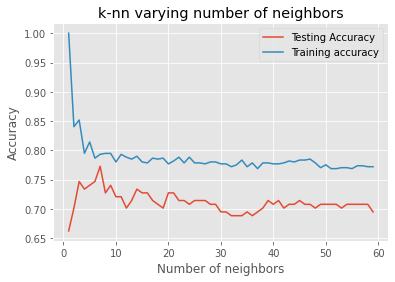

In [52]:
#Accuracy curve
#Plotting the Accuracy vs K curve. It shows an optimal k to be between 10 and 20 for the test data. The train and test data 
#have drastically different accuracy graphs though, which is interesting.

neighbors = np.arange(1,60)
#train_accuracy  = np.empty(len(neighbors))
#test_accuracy  = np.empty(len(neighbors))
train_accuracy = []
test_accuracy = []
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title('k-nn varying number of neighbors')
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [53]:
#GridSearchCV - Parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(3,40),'weights':['uniform','distance'],'metric':['euclidean','manhattan','cosine']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'weights': ['uniform', 'distance']})

In [54]:
knn_cv.best_score_

0.7719978675196588

In [55]:
knn_cv.best_params_ #Best parameters for train data

{'metric': 'euclidean', 'n_neighbors': 28, 'weights': 'uniform'}

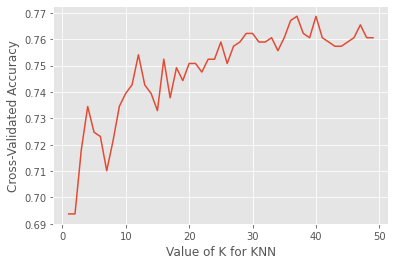

In [56]:
#Additionally, performing a cross-validation to get an optimal k. The cross-validated accuracy is same as the gridsearch 
#value of 32.
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import cross_val_score
# choose k between 1 to 50

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights= 'distance',metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Elbow Method

Text(0, 0.5, 'Error Rate')

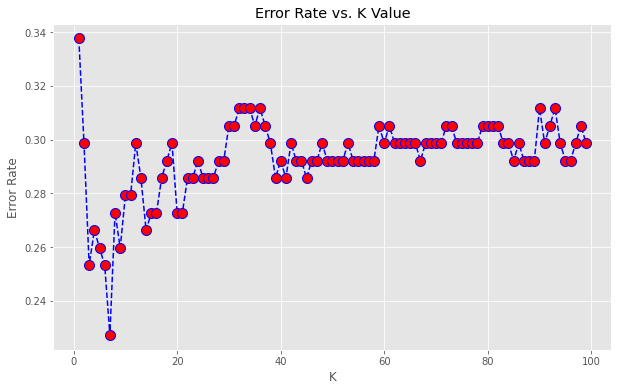

In [57]:
#Elbow method - Error computation by comparing predicted value != actuals
#But computing the elbow method on the test data though I get k=3 as optimal
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
train_accuracy  = np.empty(len(np.arange(1,100)))
test_accuracy  = np.empty(len(np.arange(1,100)))

for i in range(1,100):
 knn = KNeighborsClassifier(n_neighbors=i,weights= 'uniform',metric='euclidean')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [58]:
# For optimal k, I am seeing varied results for different methods
#Accuracy curve -> 15
#Cross validation -> 40
#Gridsearchcv(parameter tuning) -> 38
#Elbow method -> 3

# Confusion Matrix

In [60]:
# As for the test data I got an optimal k=3 from elbow method I am going ahead with it.
#Moreover with the other k values I am getting a much lower F1-Score.
from sklearn.metrics import confusion_matrix
#Confusion Matrix
knn = KNeighborsClassifier(n_neighbors=3,metric= 'euclidean', weights= 'uniform')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
tp, fn, fp, tn = confusion_matrix(y_test,pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

[[82 13]
 [26 33]]
Outcome values : 
 82 13 26 33


In [ ]:
#True positive = 75
#True negative = 36
#False Positive = 23
#False Negative = 20

# F-1 score

In [61]:
#print(classification_report(y_test,pred))
from sklearn.metrics import f1_score
print(f1_score(pred,y_test))

0.6285714285714286
